<a href="https://colab.research.google.com/github/RPGraciotti/BootCampAlura/blob/main/Modulo_1/Aula_5_Alternativas_de_visualiza%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparando conteúdo anterior

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

df = pd.read_csv("https://github.com/RPGraciotti/BootCampAlura/raw/main/Modulo_1/A184242189_28_143_208.csv", encoding = "ISO-8859-1",
                 skiprows = 3, sep = ";", skipfooter = 12,
                 thousands = ".", decimal = ",", engine = "python")
pd.options.display.float_format = "{:.2f}".format
use_col = df.mean().index.tolist()
use_col.insert(0, "Unidade da Federação")
use = df.loc[:,use_col]
use = use.set_index("Unidade da Federação")
use.sort_values(by = "Total") # crescente
total_ord = use.sort_values(by = "Total", ascending = False) # decrescente
total_ord = total_ord.drop("Total", axis = 1)
main_cols = total_ord.columns[6:]
total_ord = total_ord[main_cols]
total_ord = total_ord/1000000
total_ord.head()

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,172.96,170.56,170.34,172.46,175.49,179.57,180.01,180.15,191.86,190.93,177.09,192.41,178.64,217.01,215.13,212.91,212.72,214.08,215.27,214.25,216.12,209.18,192.16,213.51,195.79,239.41,221.20,231.92,224.04,224.16,248.76,224.12,239.35,225.64,210.71,229.15,221.66,241.45,229.92,250.82,...,259.64,279.65,254.22,285.35,286.37,291.68,279.10,286.15,295.67,277.69,302.77,278.27,266.77,291.89,268.08,287.15,292.87,309.14,281.62,307.20,303.58,294.08,303.87,282.79,273.36,303.87,272.05,277.94,255.18,314.28,328.29,361.99,350.27,338.87,328.06,324.60,326.85,324.12,268.19,177.41
31 Minas Gerais,70.30,79.12,79.05,79.27,79.62,82.21,80.37,82.41,88.61,84.49,88.93,99.02,83.68,100.26,91.83,97.29,95.72,100.05,98.98,98.20,96.96,94.77,92.41,95.81,90.76,107.39,100.84,105.49,99.67,103.37,107.84,104.34,100.53,101.94,99.54,107.77,103.15,111.08,106.09,115.49,...,138.37,146.51,130.73,151.51,150.70,153.60,150.26,156.72,160.48,146.00,157.29,148.17,145.42,153.24,142.69,151.98,157.96,163.64,154.17,166.78,161.77,157.44,166.17,152.17,152.47,158.27,141.46,147.65,127.45,142.75,157.28,177.47,182.18,181.42,174.59,168.56,166.38,155.06,119.88,79.78
41 Paraná,48.86,55.61,56.12,55.57,56.09,59.80,56.70,58.09,61.37,59.67,57.82,60.38,57.24,69.07,64.05,68.69,67.93,70.96,69.23,67.85,68.56,67.16,63.09,66.90,64.50,77.14,70.76,73.46,71.84,73.01,76.15,74.24,73.04,76.36,70.52,74.71,71.31,76.91,74.23,81.71,...,105.56,116.13,107.08,122.33,124.73,127.08,122.62,127.99,131.26,120.65,129.53,121.81,112.98,124.16,117.72,123.91,127.46,132.61,124.87,134.71,127.17,126.20,133.87,126.22,113.57,122.33,116.13,114.78,97.78,111.01,115.20,123.86,125.09,121.77,127.51,133.44,122.15,106.95,83.13,43.48
43 Rio Grande do Sul,45.90,52.93,51.97,51.68,53.76,56.39,56.23,57.91,59.59,57.57,55.70,61.52,52.10,65.11,61.59,64.40,63.09,69.14,66.06,65.22,67.57,64.19,62.24,65.49,56.96,69.93,66.49,69.11,67.57,70.07,70.88,65.08,66.56,66.10,61.74,66.92,61.37,69.00,66.23,72.17,...,82.74,91.83,77.58,91.08,91.93,91.68,90.99,94.86,96.80,87.34,97.37,90.19,81.75,92.47,85.30,91.62,92.79,99.14,95.86,103.04,98.57,94.37,96.97,91.01,88.76,97.61,85.49,84.88,76.81,87.78,96.80,108.54,111.76,110.11,113.89,116.74,116.83,102.32,84.40,37.80
33 Rio de Janeiro,44.13,42.90,45.31,43.95,44.11,44.36,42.50,43.07,44.55,41.35,43.02,60.89,40.67,52.75,48.92,51.18,57.24,53.49,51.24,48.49,48.69,49.71,44.41,55.99,44.83,54.47,78.13,56.03,51.44,53.87,57.87,53.74,52.38,50.24,50.89,74.01,61.15,55.35,55.82,59.09,...,67.38,72.45,65.06,74.43,74.58,79.42,75.99,77.58,78.92,72.87,79.19,74.02,70.83,79.66,74.14,75.06,76.86,82.67,78.69,88.18,83.62,81.56,82.53,74.78,75.15,80.41,73.15,74.60,69.44,89.73,88.14,95.94,89.80,81.89,80.57,82.81,90.57,87.20,60.87,49.15


Mexendo com operadores negativos:

In [2]:
ultimo_mes = total_ord.columns[-1]

In [3]:
gastos_ultimo_mes = total_ord[ultimo_mes]
gastos_ultimo_mes

Unidade da Federação
35 São Paulo             177.41
31 Minas Gerais           79.78
41 Paraná                 43.48
43 Rio Grande do Sul      37.80
33 Rio de Janeiro         49.15
29 Bahia                  31.31
26 Pernambuco             39.47
42 Santa Catarina         19.38
23 Ceará                  17.17
52 Goiás                  24.87
15 Pará                   13.07
21 Maranhão               17.29
32 Espírito Santo         15.61
24 Rio Grande do Norte     8.73
25 Paraíba                12.52
53 Distrito Federal       14.73
50 Mato Grosso do Sul      4.04
22 Piauí                   9.54
27 Alagoas                 8.18
51 Mato Grosso             8.84
13 Amazonas                6.80
28 Sergipe                 3.08
17 Tocantins               0.93
11 Rondônia                4.73
12 Acre                    1.14
14 Roraima                 2.38
16 Amapá                   0.99
Name: 2021/Mar, dtype: float64

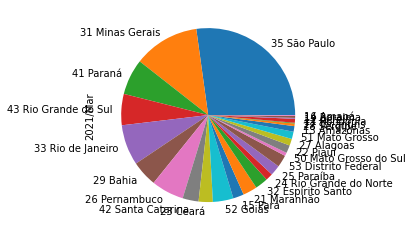

In [4]:
gastos_ultimo_mes.plot(kind = "pie")

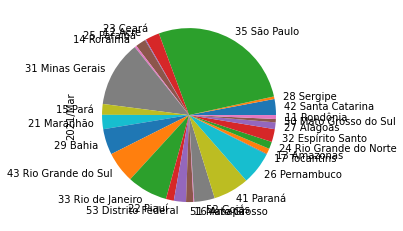

In [5]:
gastos_ultimo_mes.sample(frac = 1).plot(kind = "pie")

In [6]:
gastos_ultimo_mes/gastos_ultimo_mes.loc["33 Rio de Janeiro",]

Unidade da Federação
35 São Paulo             3.61
31 Minas Gerais          1.62
41 Paraná                0.88
43 Rio Grande do Sul     0.77
33 Rio de Janeiro        1.00
29 Bahia                 0.64
26 Pernambuco            0.80
42 Santa Catarina        0.39
23 Ceará                 0.35
52 Goiás                 0.51
15 Pará                  0.27
21 Maranhão              0.35
32 Espírito Santo        0.32
24 Rio Grande do Norte   0.18
25 Paraíba               0.25
53 Distrito Federal      0.30
50 Mato Grosso do Sul    0.08
22 Piauí                 0.19
27 Alagoas               0.17
51 Mato Grosso           0.18
13 Amazonas              0.14
28 Sergipe               0.06
17 Tocantins             0.02
11 Rondônia              0.10
12 Acre                  0.02
14 Roraima               0.05
16 Amapá                 0.02
Name: 2021/Mar, dtype: float64

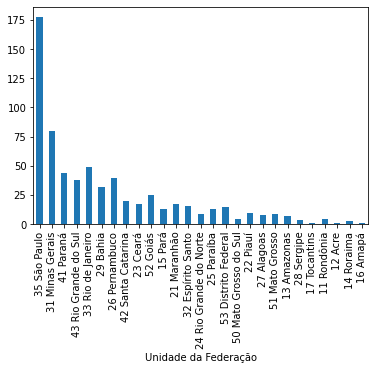

In [7]:
gastos_ultimo_mes.plot(kind = "bar")

## Desafio 01: Pesquisar a documentação do matplotlib e pandas para colocar grid no gráfico

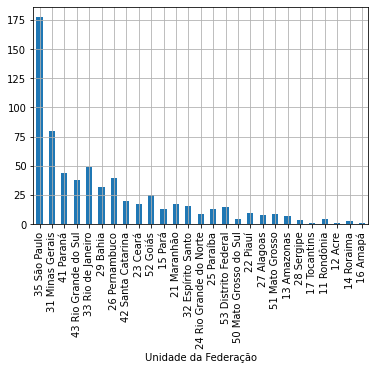

In [8]:
gastos_ultimo_mes.plot(kind = "bar")
plt.grid()

Hum, ok, mas... queremos mesmo o grid vertical? O que mais podemos alterar?

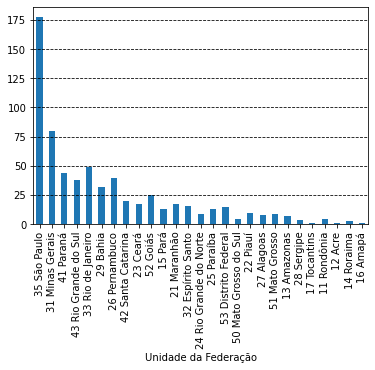

In [9]:
gastos_ultimo_mes.plot(kind = "bar")
plt.grid(axis = "y", linestyle = "--", color = "black")

Um pouco mais limpo, não?

Ordenando:

In [10]:
gastos_ultimo_mes = gastos_ultimo_mes.sort_values(ascending = False)

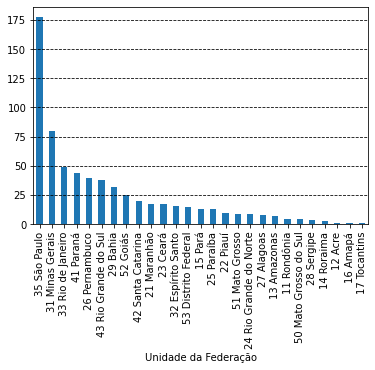

In [11]:
gastos_ultimo_mes.plot(kind = "bar")
plt.grid(axis = "y", linestyle = "--", color = "black")

## Desafio 02: Fazer um gráfico e uma tabela do gasto dos outros estados em função do seu estado, ou qualquer outro de interesse

In [12]:
gastos_ultimo_mes/gastos_ultimo_mes.loc["35 São Paulo",]

Unidade da Federação
35 São Paulo             1.00
31 Minas Gerais          0.45
33 Rio de Janeiro        0.28
41 Paraná                0.25
26 Pernambuco            0.22
43 Rio Grande do Sul     0.21
29 Bahia                 0.18
52 Goiás                 0.14
42 Santa Catarina        0.11
21 Maranhão              0.10
23 Ceará                 0.10
32 Espírito Santo        0.09
53 Distrito Federal      0.08
15 Pará                  0.07
25 Paraíba               0.07
22 Piauí                 0.05
51 Mato Grosso           0.05
24 Rio Grande do Norte   0.05
27 Alagoas               0.05
13 Amazonas              0.04
11 Rondônia              0.03
50 Mato Grosso do Sul    0.02
28 Sergipe               0.02
14 Roraima               0.01
12 Acre                  0.01
16 Amapá                 0.01
17 Tocantins             0.01
Name: 2021/Mar, dtype: float64

In [13]:
gasto_com_sp = gastos_ultimo_mes/gastos_ultimo_mes.loc["35 São Paulo",]
gasto_com_sp = gasto_com_sp.sort_values(ascending = False)

Text(0, 0.5, 'Gasto proporcional a São Paulo')

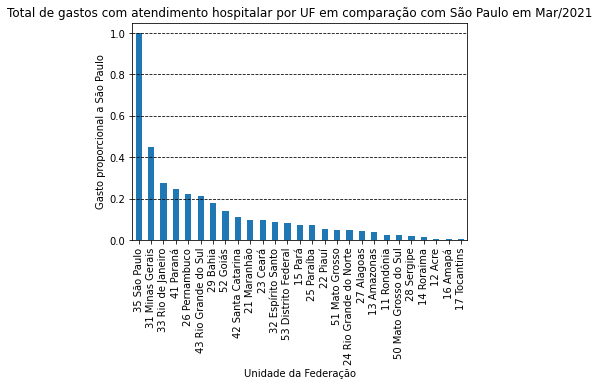

In [14]:
gasto_com_sp.plot(kind = "bar")
plt.grid(axis = "y", linestyle = "--", color = "black")
plt.title("Total de gastos com atendimento hospitalar por UF em comparação com São Paulo em Mar/2021",
          fontsize = 12)
plt.ylabel("Gasto proporcional a São Paulo", fontsize = 10)

### É interessante notar que:
como meu estado São Paulo já é o estado de maior gasto, o limite do eixo é definido como 1, ou seja, todos os estados tem valor menor que 100% do gasto de São Paulo. Se escolhermos outro estado, por exemplo, Espírito Santo, veremos que a aparência do gráfico será a mesma (pois teremos dividido os valores por uma constante), mas com eixo y diferente:

In [15]:
gasto_com_es = gastos_ultimo_mes/gastos_ultimo_mes.loc["32 Espírito Santo",]
gasto_com_es = gasto_com_es.sort_values(ascending = False)

In [16]:
gasto_com_es

Unidade da Federação
35 São Paulo             11.37
31 Minas Gerais           5.11
33 Rio de Janeiro         3.15
41 Paraná                 2.79
26 Pernambuco             2.53
43 Rio Grande do Sul      2.42
29 Bahia                  2.01
52 Goiás                  1.59
42 Santa Catarina         1.24
21 Maranhão               1.11
23 Ceará                  1.10
32 Espírito Santo         1.00
53 Distrito Federal       0.94
15 Pará                   0.84
25 Paraíba                0.80
22 Piauí                  0.61
51 Mato Grosso            0.57
24 Rio Grande do Norte    0.56
27 Alagoas                0.52
13 Amazonas               0.44
11 Rondônia               0.30
50 Mato Grosso do Sul     0.26
28 Sergipe                0.20
14 Roraima                0.15
12 Acre                   0.07
16 Amapá                  0.06
17 Tocantins              0.06
Name: 2021/Mar, dtype: float64

Text(0, 0.5, 'Gasto proporcional a Espírito Santo')

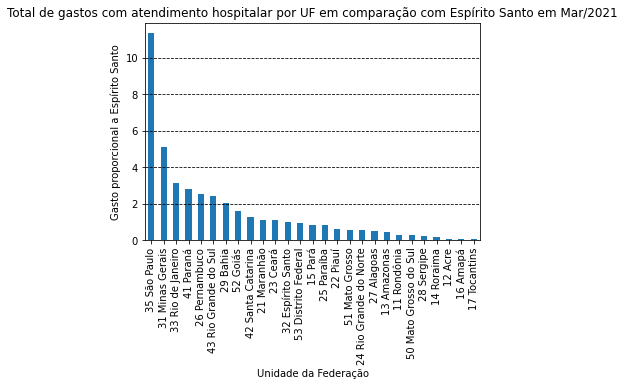

In [17]:
gasto_com_es.plot(kind = "bar")
plt.grid(axis = "y", linestyle = "--", color = "black")
plt.title("Total de gastos com atendimento hospitalar por UF em comparação com Espírito Santo em Mar/2021",
          fontsize = 12)
plt.ylabel("Gasto proporcional a Espírito Santo", fontsize = 10)

## Desafio 03: Fazer o cálculo proporcional a população do seu estado e mais um a sua escolha

De acordo com o [IBGE](https://cidades.ibge.gov.br/brasil/sp/panorama), a população estimada para o Estado de São Paulo em 2020 (última estimativa) é de 46.289.333 de pessoas. Para o Espírito Santo, o valor é de [4.064.052 pessoas](https://cidades.ibge.gov.br/brasil/es/panorama). Seguiremos com esses valores para os cálculos:

In [18]:
gastos_ultimo_mes = gastos_ultimo_mes * 1000000 # Como numa aula anterior nós 
#arredondamos os gastos, para realizar o cálculo eu preferi trabalhar com os valores originais

In [19]:
gastos_ultimo_mes_habitantes_sp = gastos_ultimo_mes.loc["35 São Paulo"]/46289333
gastos_ultimo_mes_habitantes_es = gastos_ultimo_mes.loc["32 Espírito Santo"]/4064052
#gastos_interesse = {"Estado": ["ES", "SP"], "Valor": [gastos_ultimo_mes_habitantes_es, gastos_ultimo_mes_habitantes_sp]}
gastos_interesse = pd.DataFrame(data = [gastos_ultimo_mes_habitantes_sp, gastos_ultimo_mes_habitantes_es],index = ["SP", "ES"])

<function matplotlib.pyplot.show>

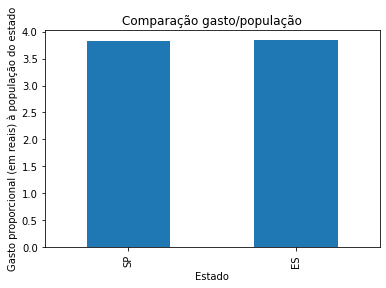

In [20]:
ax = gastos_interesse.plot(kind = "bar")
plt.title("Comparação gasto/população",
          fontsize = 12)
plt.ylabel("Gasto proporcional (em reais) à população do estado", fontsize = 10)
plt.xlabel("Estado")
ax.get_legend().remove()
plt.show

### Veja só que curioso:
O estado do Espírito Santo teve um gasto total no último mês de aproximadamente 10% do valor de São Paulo (desafio 02). Porém, vimos que a população do Espírito Santo também é mais ou menos 10% menor que São Paulo, logo, no cálculo de gasto/habitante, o resultado é muito semelhante!! Nós poderíamos nos perguntar se essa relação de gasto/habitante é parecida para todos os estados.

## Desafio 04: Faca uma análise dos dados analisados, levente hipóteses e compartilhe

## Desafio 05: Reproduza as análises feitas em aula, refletindo e levantando hipóteses

Os desafios 04 e 05 foram discutidos na resolução dos desafios anteriores:
Propus algumas hipóteses, como se a relação entre gasto/habitante se mantém em todos os estados. Uma outra questão que gostaria de abordar é selecionar outro mês do nosso conjunto de dados, por dois motivos. Vimos que o último mês de processamento possivelmente não está atualizado, e potencialmente esse valor mudará bastante. Segundo, analisando por cima o gráfico total, vemos que muita coisa mudou durante os anos de 2020 e 2021, mudanças causades pela pandemia de COVID-19. Seria interessante poder olhar para os gastos apenas desse período, ou de gastos de outros períodos para analisarmos a magnitude dos impactos que a COVID causou nas contas da saúde no Brasil.

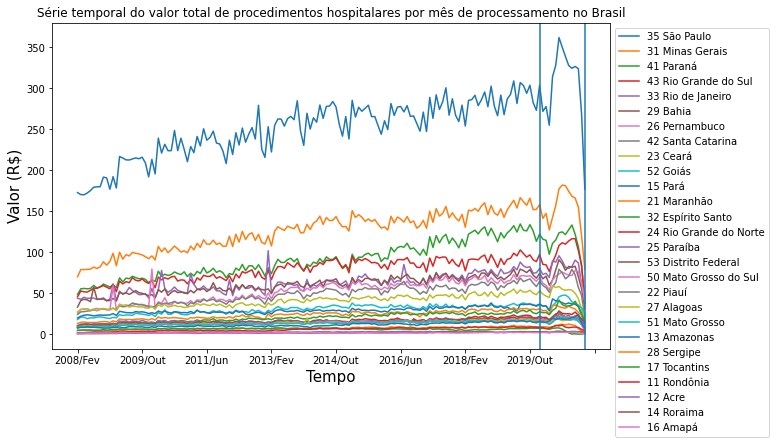

In [26]:
jan_2020 = total_ord.columns.get_loc("2020/Jan")
mar_2021 = total_ord.columns.get_loc("2021/Mar") # definindo os limites para o gráfico
ax = total_ord.T.plot(figsize = (10, 6))
plt.legend(bbox_to_anchor = (1, 1))
plt.title("Série temporal do valor total de procedimentos hospitalares por mês de processamento no Brasil",
          fontsize = 12)
plt.xlabel("Tempo", fontsize = 15)
plt.ylabel("Valor (R$)", fontsize = 15)
ax.axvline(x = jan_2020)
ax.axvline(x = mar_2021)
plt.show()